# Módulo: Aprendizaje Profundo
## Redes neuronales recurrentes

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [5]:
#descarga set de datos atmosféricos
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [7]:
df = pd.read_csv(csv_path)
df = df[5::6] #deja solamente los datos a cada hora

#saca c
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


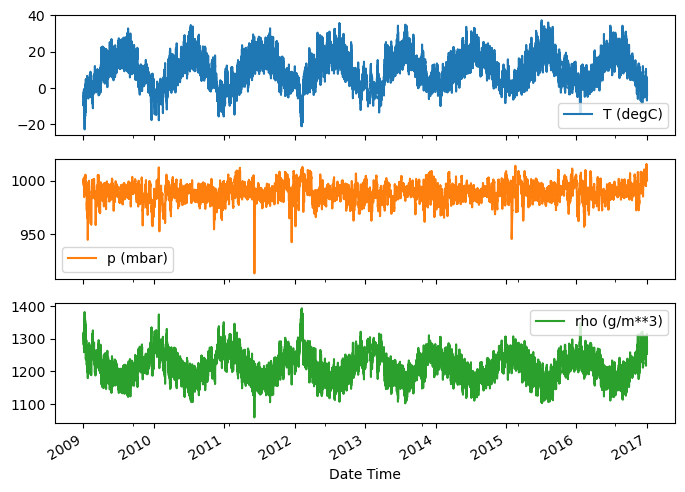

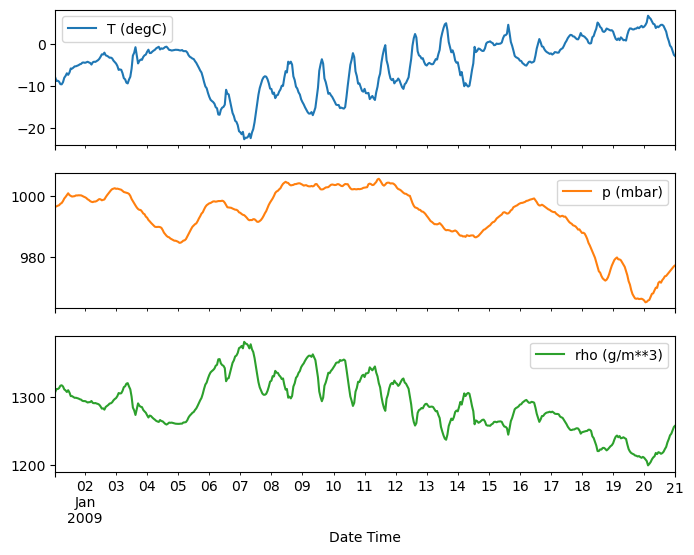

In [4]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

# Introducción

## Redes neuronales recurrentes

Las conexiones entre unidades pueden crear **ciclos**, por lo que la salida de una neurona puede afectar a su propia entrada.

Son especialmente útiles para modelar comportamiento **temporales** o dinámicos.

<center>
    <img src="figures/recurrent-1.png" width="500"/>
</center>


# Introducción


<center>
    <img src="figures/intro-deep-1.jpg" width="1300"/>
</center>

## Generalidades

Una ANN realiza **composiciones de funciones** simples para formar una función más compleja.

En teoría, una única composición de funciones simples puede aproximar a casi cualquier función compleja, pero esto requiere una **enorme cantidad de parámetros**.

<center>
    <img src="figures/ann-ex-1.png" width="400"/>
</center>

Incluso es posible demostrar que un MLP con varias capas ocultas usando la **función identidad**, no tiene ninguna ventaja frente al MLP con solo una capa oculta.


El aprendizaje profundo realiza **repetidas composiciones** de funciones no-lineales (muchas capas ocultas), lo que tiene un gran poder expresivo

\begin{align}
    \hat{\mathbf{Y}} = f_1( f_2( f_3( ... f_n( \mathbf{X} ) ) ) )
\end{align}

Esto puede reducir considerablemente la cantidad de parámetros totales necesarios dependiendo de las funciones de activación usadas.

<center>
    <img src="figures/intro-deep-2.jpg" width="600"/>
</center>



Las arquitecturas profundas aprovechan mejor los **patrones repetitivos** en los datos para lograr mejor generalización incluso en áreas del espacio con pocos o sin datos.

Usualmente estos patrones repetitivos se aprenden como pesos de **atributos jerarquizados**.

<center>
    <img src="figures/intro-deep-3.gif" width="800"/>
</center>



## Ejemplo
Una función unidimensional toma alternadamente valores +1 o -1 un total de 8 veces. ¿De qué forma puede construirse una ANN para aproximar esta función?

<center>
    <img src="figures/funscale-deep-1.png" width="600"/>
</center>

Usando una **ANN superficial**, deberían por lo menos haber 8 unidades para aproximar cada valor (sin contar las unidades de sesgo u offset)

Así, dependiendo de la entrada, debería "activarse" una de las 8 unidades para entregar la salida correcta

<center>
    <img src="figures/ann-ex-3.png" width="1000"/>
</center>

Usando una **ANN profunda**, se podrían usar 3 capas de 2 unidades para obtener un total de 8 "caminos" que se activan para entregar la salida correcta dependiendo de la entrada.

<center>
    <img src="figures/funscale-deep-3.png" width="500"/>
</center>

Así, la ANN profunda aprende parámetros de forma **jerarquizada**. 

Por ejemplo, la primera capa aprende un escalón simple, la segunda capa aprende un escalón doble, y sucesivamente.

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

X = [[0.], [1.], [2.], [3.], [4.], [5.], [6.], [7.]]
y = [1., -1., 1., -1., 1., -1., 1., -1.]

clf = MLPRegressor(random_state=4, tol=1.e-8, alpha=1.e-8, hidden_layer_sizes=(128,),
                   activation='tanh', solver='lbfgs', max_iter=int(1e8), batch_size=1)
clf.fit(X, y)
y_predict = clf.predict(X)
print(mean_squared_error(y, y_predict))
print(y_predict)

4.328055637578201e-10
[ 1.00000689 -1.00000619  0.99999465 -1.00000652  0.99999522 -0.99997812
  0.99996138 -0.99996377]


In [2]:
clf = MLPRegressor(random_state=4, tol=1.e-8, alpha=1.e-8, hidden_layer_sizes=16*(8, ),
                   activation='tanh', solver='lbfgs', max_iter=int(1e8), batch_size=1)
clf.fit(X, y)
y_predict = clf.predict(X)
print(mean_squared_error(y, y_predict))
print(y_predict)

0.37675587489828755
[ 1.00079232 -0.99999358  0.99944706 -0.98411517  0.82330869 -0.20941274
 -0.35643113 -0.28052778]


# Arquitecturas comunes

## Redes superficiales (shallow network)
La mayoría de los modelos de aprendizaje automático (regresión lineal, logística, SVM, PCA, etc.) pueden simularse como una red neuronal de 1 ó 2 capas ocultas.

<center>
    <img src="figures/ann-5.png" width="500"/>
</center>

Un tipo de red superficial sería el perceptrón multicapa con 1 ó 2 capas ocultas.

Estas redes están totalmente conectadas, es decir, hay conexión directa entre todas las unidades.

Son un tipo de red prealimentada (feed forward) en las que el flujo va direccionalmente desde capas anteriores a capas posteriores.

<center>
    <img src="figures/ann-gif-1.gif" width="700"/>
</center>

## Redes de base radial (RBF, radial basis function)

A pesar de no ser profunda, difiere de las redes prealimentadas ya que tienen una parte entrenada no supervisadamente y una parte entrenada supervisadamente.

Comúnmente tienen una capa oculta con una cantidad de unidades superior al de la capa de entrada.

<center>
    <img src="figures/rbf-1.png" width="700"/>
</center>

Primero, de manera no supervisada se obtiene el **vector prototipo** $\bar{\mu_i}$ para la $i$-ésima unidad oculta. Además, se obtiene un **ancho de banda** $\sigma_i$ para cada unidad oculta.

Luego, para cada vector de atributos $\bar{X}$ que pasa a la capa oculta se define la **función de activación radial** $\phi_{i}(\bar{X})$ como sigue:

\begin{split}
    h_{i} = \phi_{i}(\bar{X}) = \text{exp} \left( {- \frac{ \| \bar{X} - \bar{\mu_i} \|^{2} }{ 2 \sigma_{i}^2 } } \right) \; \forall i \in \{1, ..., m\}
\end{split}

<center>
    <img src="figures/rbf-2.jpeg" width="500"/>
</center>

Cada una de las $m$ unidades ocultas tendrá gran influencia en los datos cercanos a su vector prototipo. Es decir, este tipo de red actúa como un método de **agrupamiento**.

Luego se calcula la predicción en la capa de salida de la red como se fuera un **perceptrón**, es decir:

\begin{split}
    \hat{y} = \sum_{i=1}^{m} w_{i} \phi_{i}(\bar{X}) = \sum_{i=1}^{m} w_{i} \text{exp} \left( {- \frac{ \| \bar{X} - \bar{\mu_i} \|^{2} }{ 2 \sigma_{i}^2 } } \right)
\end{split}

Los valores de los pesos $w_{i}$ se aprenden de forma **supervisada** como en una red prealimentada. También se implementa una neurona de sesgo.

## Máquinas restringidas de Boltzmann

Utilizan el concepto de minimización de energía para crear una red neuronal de forma no supervisada.

También se puede ser un entrenamiento posterior de forma supervisada.

Es diferente a las redes prealimentadas en varios sentidos:
- Modela la **probabilidad conjunta** de los atributos en vez de minimizar una función de costo.
- Tienen **flujo no directo**, ya que aprenden relaciones probabilísticas en vez de mapeos entrada-salida.
- Crea representaciones **latentes** (ocultas) de los datos.

## Redes neuronales recurrentes

Las conexiones entre unidades pueden crear **ciclos**, por lo que la salida de una neurona puede afectar a su propia entrada.

Son especialmente útiles para modelar comportamiento **temporales** o dinámicos.

<center>
    <img src="figures/recurrent-1.png" width="500"/>
</center>


# Redes neuronales convolucionales 
(CNN, convolutional neural networks)


## Fundamentos

Históricamente han sido el tipo de ANN más exitosa, usadas principalmente para reconocimiento de imágenes, localización de objetos y procesamiento de texto, entre otros.

Están inspiradas por el funcionamiento del cortex visual de los gatos, en donde porciones específicas del campo visual activan ciertas neuronas.

<center>
    <img src="figures/cnn-0.png" width="1000"/>
</center>

Están basadas en el concepto de la convolución entre dos funciones:

\begin{align}
    (f \ast g)(t) = \int_{-\infty}^\infty f(\tau) g(t - \tau) d\tau
\end{align}

<center>
    <img src="figures/convo-gif-1.gif" width="800"/>
</center>

<center>
    <img src="figures/convo-gif-3.gif" width="800"/>
</center>

## Capas convolucionales

Intuitivamente la operación de convolución utiliza filtros (kernels) adecuados para detectar determinados patrones dentro de las imágenes.

<center>
    <img src="figures/convolution-2-gif.gif" width="800"/>
</center>

Sin embargo, algunos filtros son más abstractos y no tienen necesariamente una interpretación intuitiva.

Dada una capa $i$, los valores de la capa $i+1$ son el producto punto entre los valores (pesos) del filtro y regiones espaciales de la capa actual de igual dimensión

<center>
    <img src="figures/convolution-gif.gif" width="800"/>
</center>

Al resultado de la operación también se le puede aplicar una función de activación (e.g. ReLU).

Al aplicar más de un filtro a una misma capa, se pueden generar capas sucesivas tridimensionales.

<center>
    <img src="figures/convo-4.gif" width="600"/>
</center>

*Ej.: al aplicar 3 filtros de profundidad 1 a una capa de profundidad 1, se generará una capa de profundidad 3*


También existen filtros tridimensionales de profundidad determinada para aplicar a capas que ya son tridimensionales.

<center>
    <img src="figures/convo-5.gif" width="600"/>
</center>

*Ej.: al aplicar 1 filtro de profundidad 3 a una capa de profundidad 3, se generará una capa de profundidad 1*

En general, es posible aplicar cualquier cantidad de filtros de profundidad determinada a cualquier capa de cualquier otra profundidad.

<br><center>
    <img src="figures/convo-6.png" width="1000"/>
</center>

*Ej.: aplicar un filtro de 3x3x3 sobre una capa de 4x5x4 resulta en una capa de 2x3x2*


## Capas de submuestreo (pooling)

El submuestreo consiste en reducir la dimensionalidad de las capas convolucionales.

Se busca reducir el costo computacional, aumentar la tolerancia a pequeñas distorsiones y hacer la CNN lo más genérica posible.

<center>
    <img src="figures/pooling-2.jpeg" width="500"/>
</center>

Los tipos más comunes son el submuestreo promediado y submuestreo máximo.
- Average pooling: se van tomando promedios cada $a x b$ posiciones
- Max pooling: se van tomando el valor máximo cada $a x b$ posiciones

<center>
    <img src="figures/pooling-gif.gif" width="700"/>
</center>



## Capa totalmente conectada (fully connected)

Luego de sucesivas capas convolucionales y de submuestreo se suele aplicar una capa totalmente conectada.

Esto se hace para ponderar toda la información presente en la capa anterior, que hasta el momento retenía la estructura espacial de la entrada original.

<center>
    <img src="figures/convo-9.png" width="1100"/>
</center>

## Capa softmax

Si la CNN se utiliza para clasificación, luego de la capa totalmente conectada se aplica una capa softmax para predecir las probabilidades para cada clase.

<br><center>
    <img src="figures/softmax.png" width="700"/>
</center>

## Capa de dilución (dropout)

Se trata de una capa especial usada durante el entrenamiento para prevenir el sobreajuste.

Consiste en aleatoriamente no considerar algunas unidades durante el entrenamiento.

<center>
    <img src="figures/dropout-1.png" width="700"/>
</center>

Con esta técnica se busca aumentar la capacidad de generalización de la red.

## Funcionamiento de una CNN

Las conexiones en una CNN son muy escasas, ya que una activación en una capa particular es función solo de una pequeña región espacial de la capa anterior.

<center>
    <img src="figures/cnn-1.jpeg" width="1200"/>
</center>

Los atributos en las capas inferiores capturan formas primitivas como líneas, mientras que los atributos es capas superiores captan formas complejas.

Por su funcionamiento jerarquico en encontrar atributos de bajo nivel y combinarlos para formar atributos de alto nivel, es posible utilizar CNN preentrenadas para distintos tipos de aplicaciones.


<center>
    <img src="figures/cnn-2.png" width="1200"/>
</center>

En estos casos solo se realiza un ajuste fino en la última capa de la CNN para adaptarla al caso en particular.

## Arquitectura LeNet-5

Es una de las primeras arquitecturas de CNN preentrenadas para **reconocer texto**.

Consta de **3 capas convolucionales** combinadas son **submuestreo promedio**. Luego siguen capas **totalmente conectadas** y un clasificador **softmax**.

La entrada es una imagen de 32x32 pixeles en escala de grises, por lo que el número de canales (o profundidad) es 1.

<center>
    <img src="figures/lenet-1.png" width="200"/>
</center>

La primera convolución utiliza **6 filtros** de tamaño **5x5**.

Como resultado se obtiene un mapa de atributos de tamaño **28x28x6**.

<center>
    <img src="figures/lenet-2.png" width="900"/>
</center>

Aquí el número de canales es igual a la cantidad de filtros aplicados, osea **6**.



La primera operación de **submuestreo** (pooling) promedia los valores en regiones de **2x2**.

<center>
    <img src="figures/lenet-3.png" width="600"/>
</center>

Como resultado, se reduce el tamaño de los mapas de atributos a la mitad, pero el número de canales se mantiene igual.



Luego se vuelve a realizar otra convolución, otro submuestreo y otra convolución hasta llegar a un mapa de atributos lineal de 120 valores.

<center>
    <img src="figures/lenet-4.png" width="1000"/>
</center>

Finalmente se agrega una capa **totalmente conectada** con **84** unidades y una capa de clasificación **softmax** con **10** unidades.

<center>
    <img src="figures/lenet-5.png" width="1000"/>
</center>

Sin considerar la capa softmax, todas las demás capas utilizan la función de activación **tanh**.


<center>
    <img src="figures/lenet-gif.gif" width="1200"/>
</center>

# Implementación en Python

## Librerías

Hay principalmente 3 librerías para implementar modelos de aprendizaje profundo en Python:

- Tensorflow
- Pytorch
- Keras

Estas librerías permiten formar fácilmente capas convolucionales, pooling, etc.

Se diferencian en cuanto a la complejidad de usar, compatibilidad, velocidad, etc.

<center>
    <img src="figures/comparison-deep.png" width="1200"/>
</center>

## Uso de la GPU

Debido a la considerable mayor cantidad de atributos y operaciones computacionales presentes en una red profunda, los tiempos de entrenamiento son mucho mayores.

Esto se logra solucionar mediante el uso de la tarjeta gráfica (GPU) en vez del procesador central (CPU) para realizar los cálculos.

<center>
    <img src="figures/gpu-1.png" width="800"/>
</center>

El poder usar la GPU para los cálculos se logra mediante la plataforma **CUDA** de Nvidia.

Las librerías anteriores pueden detectar si la GPU del PC es compatible con CUDA. 

<center>
    <img src="figures/cuda.jpg" width="500"/>
</center>

En **Keras**, si la GPU es compatible los cálculos se realizarán automáticamente en ella.

Aquí se puede revisar el listado de GPUs compatibles:

https://developer.nvidia.com/cuda-gpus



# CNN para reconocimiento de dígitos escritos a mano

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9647497878643652478
xla_global_id: -1
]


In [4]:
from tensorflow.config import list_physical_devices
list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# parametros de los datos
num_classes = 10
input_shape = (28, 28, 1)

# carga los datos y crea sets de entrenamiento y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)


la clase verdadera es:  3


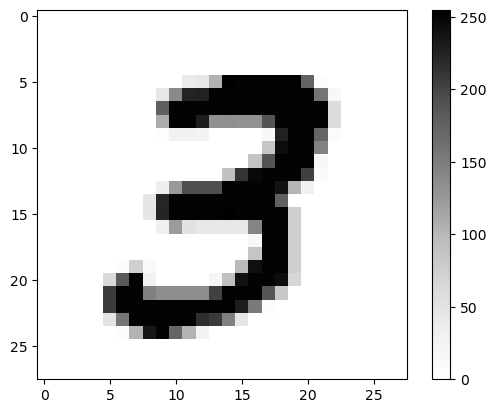

valor máximo en la imagen =  255


In [6]:
idx = 7
print('la clase verdadera es: ', y_train[idx])
plt.imshow(x_train[idx], cmap='Greys')
plt.colorbar()
plt.show()
print('valor máximo en la imagen = ', np.max(x_train[idx]))

In [7]:
# escala imagenes al rango 0-1 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# asegurarse que las imagenes tengan tamaño 28x28x1
x_train = np.expand_dims(x_train, -1) #agrega dimension extra
x_test = np.expand_dims(x_test, -1) #agrega dimension extra
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# transforma la variable objetivo en un vector de clases
print(y_train[idx])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_train[idx])

3
(60000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
model = keras.Sequential([keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [10]:
batch_size = 128
epochs = 15
#compila el modelo, definiendo solver, metrica y funcion de costo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#comienza el entrenamiento
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 18s 38ms/step - loss: 0.3551 - accuracy: 0.8923 - val_loss: 0.0930 - val_accuracy: 0.9738
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.1161 - accuracy: 0.9642 - val_loss: 0.0623 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0521 - val_accuracy: 0.9850
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0413 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0361 - val_accura

In [11]:
#evalua el modelo para datos de test
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024228792637586594
Test accuracy: 0.991100013256073


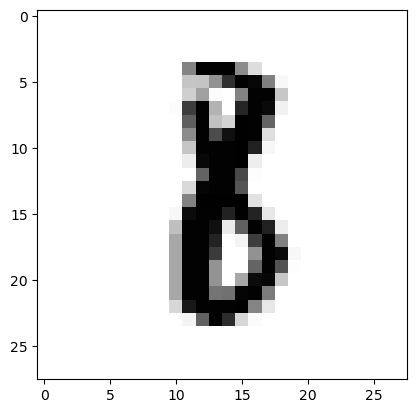

**la clase verdadera es:  8
1/1 [==============================] - 0s 219ms/step
**la clase predicha es:  8


In [12]:
#verifica predicciones para algunos datos
idx = 257 #259
plt.imshow(x_test[idx], cmap='Greys')
plt.show()

print('**la clase verdadera es: ', np.argmax(y_test[idx]))

prediction = model.predict(np.expand_dims(x_test[idx], 0))
print('**la clase predicha es: ', np.argmax(prediction))

**Pero... ¿funciona realmente en la práctica?**

<br><center>
    <img src="figures/sus-1.png" width="500"/>
</center>


In [22]:
import PIL #modulo PILLOW para trabajar con imagenes 

im = PIL.Image.open("others/m3.jpg") #abre la imagen
im = im.rotate(-90)
im.show() #muestra la imagen en nueva ventana
im = im.resize((28, 28)) #redimensiona a 28x28 px
im = im.convert(mode="L") #pasa a escala de grises
im.show() #muestra la imagen en nueva ventana

In [23]:
imarr = np.asarray(im) #pasa la imagen a array
imarr = np.max(imarr) - imarr #invierte colores en el array
imarr = imarr/np.max(imarr) #normaliza en el rango 0-1
imarr = np.expand_dims(imarr, -1) #agrega la dimension de la profunidad al final

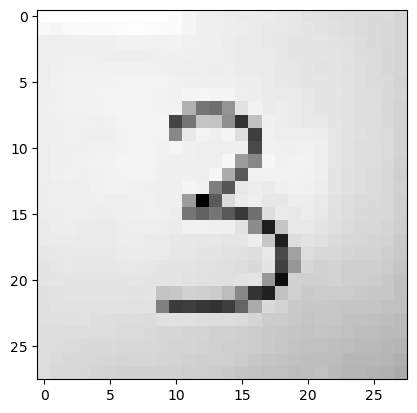

1/1 [==============================] - 0s 55ms/step
**la clase predicha es:  3


In [24]:
plt.imshow(imarr, cmap='Greys') #grafica la imagen en colores grises
plt.show()

imarr_one = np.expand_dims(imarr, 0) #crea un grupo de solo 1 imagen
myprediction = model.predict(imarr_one) #predice la imagen
print('**la clase predicha es: ', np.argmax(myprediction))

# Sumario
- El aprendizaje profundo se aprovecha de las repetidas composiciones de funciones no-lineales para encontrar patrones de estructura jerarquizada en los datos.
- Por su naturaleza, el entrenamiento de los modelos requieren de muchos más datos y tiempo de cálculo.
- Las CNN destacan por su habilidad en el ámbito del reconocimiento y análisis de imágenes.